In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('weather.csv',index_col=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [4]:
df.shape

(142193, 22)

In [5]:
#抽取5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0)

In [6]:
weather.index = range(weather.shape[0]) #重置索引
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [7]:
weather.columns  #提取特征名

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [8]:
weather.Date.value_counts()

2009-08-23    9
2013-07-06    7
2015-11-06    7
2015-08-20    7
2009-07-02    7
2014-01-04    6
2012-06-17    6
2015-10-26    6
2009-02-22    6
2016-03-09    6
2015-10-10    6
2013-05-03    6
2017-05-29    6
2015-02-09    6
2016-08-27    6
2010-02-28    6
2015-11-27    5
2010-08-29    5
2013-09-09    5
2014-09-05    5
2017-04-28    5
2015-07-13    5
2015-11-19    5
2015-01-12    5
2011-01-24    5
2014-12-16    5
2011-09-11    5
2017-02-25    5
2017-05-25    5
2012-06-02    5
             ..
2012-04-08    1
2011-03-11    1
2012-09-29    1
2012-02-19    1
2012-02-11    1
2015-06-04    1
2008-10-28    1
2016-11-01    1
2016-06-07    1
2012-07-25    1
2010-09-28    1
2008-12-20    1
2014-04-29    1
2010-09-22    1
2017-03-15    1
2011-10-07    1
2012-01-22    1
2016-09-14    1
2014-05-17    1
2016-05-02    1
2013-12-13    1
2015-10-14    1
2016-10-25    1
2015-04-26    1
2011-02-22    1
2010-01-18    1
2011-06-06    1
2016-06-10    1
2010-05-31    1
2014-12-03    1
Name: Date, Length: 2486

In [9]:
weather.Location.value_counts()  #气象站

Newcastle           133
Sydney              125
PerthAirport        125
Darwin              124
NorahHead           122
Hobart              122
Brisbane            121
Perth               121
Adelaide            117
SalmonGums          117
Launceston          116
Wollongong          112
MountGinini         112
PearceRAAF          112
Albany              111
Cairns              109
Watsonia            108
Canberra            108
Albury              107
Ballarat            107
Cobar               107
Nuriootpa           106
BadgerysCreek       106
CoffsHarbour        106
NorfolkIsland       105
MelbourneAirport    105
Richmond            105
Moree               103
AliceSprings        102
SydneyAirport       101
GoldCoast           100
Walpole             100
Witchcliffe          98
Townsville           97
Bendigo              97
Tuggeranong          97
MountGambier         97
Sale                 95
Mildura              94
Penrith              94
Williamtown          91
Portland        

In [10]:
weather.Rainfall.value_counts()   #降雨量状况

0.0     3167
0.2      309
0.4      124
1.0       81
0.6       79
0.8       67
1.4       65
1.2       54
1.8       44
1.6       37
2.2       35
2.6       34
2.4       31
2.0       30
3.0       28
3.6       26
2.8       25
3.2       23
4.0       20
4.2       17
3.8       17
4.8       15
3.4       15
4.6       15
8.0       13
6.0       13
7.8       12
5.6       12
4.4       12
10.0      11
        ... 
21.8       1
6.4        1
43.2       1
45.0       1
21.2       1
74.8       1
25.2       1
58.2       1
20.4       1
27.4       1
14.2       1
32.2       1
23.6       1
46.8       1
73.2       1
53.6       1
19.0       1
29.8       1
57.6       1
11.6       1
53.8       1
24.6       1
19.6       1
38.8       1
38.0       1
33.0       1
8.5        1
27.0       1
42.0       1
54.2       1
Name: Rainfall, Length: 198, dtype: int64

In [11]:
weather.Cloud9am.value_counts()  #天空被云层遮蔽的程度    分类型数据

7.0    686
1.0    538
8.0    488
0.0    307
6.0    273
2.0    239
5.0    220
3.0    209
4.0    163
Name: Cloud9am, dtype: int64

In [12]:
#查看整体信息
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

In [13]:
#提取特征矩阵和标签
X=weather.iloc[:,:-1]
Y=weather.iloc[:,-1]

In [14]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,13.0,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7


In [15]:
#探索标签的分类
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [16]:
#探索缺失值比率
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y,test_size=0.3,random_state=420)

In [18]:
Xtrain.shape

(3500, 21)

In [19]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [20]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2


In [21]:
#查看标签是否有样本不均衡问题
Ytrain.value_counts()

No     2710
Yes     790
Name: RainTomorrow, dtype: int64

In [22]:
#from sklearn.preprocessing import OrdinaEncoder  特征编码包
#对标签进行编码
from sklearn.preprocessing import LabelEncoder  #标签编码包
encorder = LabelEncoder().fit(Ytrain)   #实例化（加个括号） 并训练

In [23]:
Ytrain= pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

In [24]:
Ytest

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [25]:
# 关于fit 、transform 和fit_transform

#fit 完成得到模型，若要模型用于不同的对象上，就用fit 和transform
#fit之后的模型用在同一个对象上就用 fit_transform

### 处理特征矩阵

In [26]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [27]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [28]:
#提取出所有的数值型特征的列名
col = Xtrain.mean().index

In [29]:
col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [30]:
#查看训练集各列异常值的比例  （大于3倍的标准差是异常值）
(np.abs((Xtrain.loc[:,col] -Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0]

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [31]:
#删除异常值
deltrain = []
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i] -Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind))

In [32]:
 deltrain1=list(set(deltrain))  #去重之后有异常值的行索引

In [33]:
#查看测试集各列缺失值（注意这里的均值和方差需要用训练集的）
(np.abs((Xtest.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]

MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [34]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] -Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind))

In [35]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest))

In [36]:
#删除异常值（特征和标签都要删除）
Xtrain = Xtrain.drop(index=deltrain1)
Ytrain = Ytrain.drop(index=deltrain1)
Xtest = Xtest.drop(index=deltest1)
Ytest = Ytest.drop(index=deltest1)

In [37]:
#删除完毕之后，观察原始的数据结构，确认删除正确
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
5,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [38]:
#进行任何行删除之后，千万记得要恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [39]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


### 处理困难特征：日期

In [40]:
Xtrain[Xtrain.Date=='2015-11-06']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
138,2015-11-06,MountGambier,12.4,16.5,1.6,1.8,3.7,WSW,39.0,SW,...,17.0,26.0,96.0,64.0,1013.3,1014.2,8.0,7.0,12.6,15.0
1204,2015-11-06,CoffsHarbour,20.1,28.3,7.2,NaN,NaN,NE,46.0,NNE,...,17.0,31.0,81.0,66.0,1010.9,1006.4,NaN,NaN,23.3,25.6
1854,2015-11-06,Ballarat,12.6,15.0,1.4,NaN,NaN,WSW,35.0,SW,...,17.0,22.0,100.0,99.0,1010.2,1010.9,7.0,8.0,12.8,14.8
2332,2015-11-06,MountGinini,7.5,10.8,16.0,NaN,NaN,W,43.0,W,...,15.0,11.0,97.0,97.0,NaN,NaN,NaN,NaN,8.5,9.7
2732,2015-11-06,Newcastle,17.7,30.0,2.0,NaN,NaN,NaN,NaN,N,...,9.0,NaN,75.0,NaN,NaN,NaN,5.0,NaN,24.0,NaN
2911,2015-11-06,Launceston,15.8,26.2,5.0,NaN,NaN,NNW,35.0,NNW,...,4.0,20.0,88.0,66.0,NaN,NaN,7.0,8.0,17.9,24.1


In [41]:
#查看重复值
Xtrain.duplicated().sum()

#删除重复值
#drop_duplicates()

0

In [42]:
#查看日期种类 法一
Xtrain.Date.value_counts().count()

2025

In [43]:
#查看日期种类 法二
len(set(Xtrain.Date))    #set()  unique()  去重

2025

In [44]:
Xtrain.Rainfall.value_counts()

0.0     2157
0.2      209
0.4       90
1.0       54
0.6       48
0.8       45
1.4       43
1.2       35
1.8       31
1.6       28
2.2       21
2.0       21
2.4       21
2.6       21
3.6       20
3.0       19
3.2       15
2.8       15
3.8       13
6.0       12
4.0       11
4.8       10
3.4       10
4.6        9
4.2        9
9.8        9
5.8        8
7.2        8
5.6        8
11.8       7
        ... 
8.2        2
21.6       2
21.0       2
17.4       2
20.0       2
19.8       1
0.3        1
21.2       1
1.1        1
19.0       1
15.4       1
18.4       1
19.2       1
2.3        1
21.8       1
19.6       1
5.5        1
18.0       1
14.0       1
8.5        1
15.8       1
6.9        1
11.6       1
18.6       1
13.6       1
14.2       1
16.4       1
18.8       1
19.4       1
17.8       1
Name: Rainfall, Length: 113, dtype: int64

In [45]:
#查看Rainfall是否存在的缺失值
Xtrain.Rainfall.isnull().sum()

38

In [46]:
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"   #增加了一列 RainToday
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan

In [47]:
Xtrain.RainToday.value_counts()

No     2555
Yes     708
Name: RainToday, dtype: int64

In [48]:
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [49]:
int(Xtrain.loc[0,"Date"].split("-")[1]) #提取出月份

3

In [50]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
#apply指的是循环
Xtrain = Xtrain.rename(columns={"Date":"Month"})  # 修改列名

In [51]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

### 处理分类型变量：缺失值

In [52]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Location         0.000000
MinTemp          0.006968
MaxTemp          0.002121
Rainfall         0.011512
Evaporation      0.432899
Sunshine         0.475613
WindGustDir      0.069979
WindGustSpeed    0.069676
WindDir9am       0.073614
WindDir3pm       0.029991
WindSpeed9am     0.008482
WindSpeed3pm     0.021509
Humidity9am      0.010906
Humidity3pm      0.027264
Pressure9am      0.102999
Pressure3pm      0.103302
Cloud9am         0.369888
Cloud3pm         0.396547
Temp9am          0.004847
Temp3pm          0.021206
RainToday        0.011512
dtype: float64

In [53]:
#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()

In [54]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [55]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")  #实例化模型

In [56]:
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:,cate])  #生成每一列的众数

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [57]:
#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [58]:
Xtrain.loc[:,cate].isnull().sum()  #确认是否还有缺失值

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

#### 处理分类型变量：将分类型变量编码

In [59]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder   #特征编码专用包（特征必须二维及以上）
oe = OrdinalEncoder()

In [60]:
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])  #相当于对每一列编码，并记录对应关系

In [61]:
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [62]:
Xtrain.loc[:,cate].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,45.0,9.0,7.0,9.0,0.0,7.0,3.0
1,15.0,2.0,3.0,9.0,0.0,7.0,1.0
2,44.0,8.0,12.0,11.0,1.0,8.0,7.0
3,41.0,12.0,0.0,12.0,0.0,7.0,1.0
4,17.0,6.0,10.0,3.0,0.0,6.0,1.0


In [63]:
Xtest.loc[:,cate].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,17.0,9.0,0.0,8.0,0.0,7.0,7.0
1,0.0,9.0,3.0,2.0,0.0,7.0,7.0
2,33.0,0.0,9.0,2.0,0.0,8.0,1.0
3,33.0,2.0,2.0,9.0,0.0,6.0,3.0
4,33.0,11.0,12.0,12.0,1.0,7.0,8.0


#### 处理连续型变量：填补缺失值 

In [64]:
#提取连续型特征的名
col = Xtrain.columns.tolist()

for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [65]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")

In [66]:
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col])  #相当于计算每一列的均值

In [67]:
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [68]:
#确认训练集中是否还有缺失值
Xtrain.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [69]:
Xtest.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### 处理量纲问题

In [70]:
#查看是否存在量纲不统一问题
Xtrain.describe().T    # 主要看最大值  

,count,mean,std,min,25%,50%,75%,max
Month,3301.0,6.360497,3.431097,1.0,3.000000,6.000000,9.0,12.0
Location,3301.0,23.456831,14.057405,0.0,11.000000,23.000000,35.0,48.0
MinTemp,3301.0,12.254912,6.291149,-5.3,7.700000,12.000000,16.8,29.1
MaxTemp,3301.0,23.285641,6.788046,3.4,18.300000,22.800000,28.1,42.9
Rainfall,3301.0,1.299081,3.327557,0.0,0.000000,0.000000,0.6,21.8
Evaporation,3301.0,5.173344,2.381357,0.0,4.200000,5.173344,5.2,16.6
Sunshine,3301.0,7.826516,2.627575,0.0,7.826516,7.826516,8.9,14.3
WindGustDir,3301.0,7.771584,4.520786,0.0,4.000000,9.000000,11.0,15.0
WindGustSpeed,3301.0,38.749267,11.634887,9.0,31.000000,38.749267,44.0,80.0
WindDir9am,3301.0,6.932445,4.501917,0.0,3.000000,7.000000,11.0,15.0


In [71]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [72]:
#对连续性数据进行数据 标准化  =（X-均值）/标准差
from sklearn.preprocessing import StandardScaler  #标准化包

ss = StandardScaler() #实例化
ss = ss.fit(Xtrain.loc[:,col]) #相当于生成每一列的均值和标准差
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [73]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.0,45.0,1.072318,0.959826,-0.390460,1.019177,-8.622049e-02,9.0,-0.924022,7.0,...,0.084288,0.775155,0.348282,-2.323437e-01,-3.062943e-01,7.0,3.0,0.995825,1.134599,0.0
1,9.0,15.0,-1.026186,-1.574423,-0.390460,-0.744791,-3.907299e-01,2.0,-0.666138,3.0,...,0.084288,0.000000,-0.260446,1.708938e-01,1.781508e-01,7.0,1.0,-1.415539,-1.543087,0.0
2,7.0,44.0,-0.899004,-1.692296,0.391013,-1.668774,-2.217786e+00,8.0,0.021553,12.0,...,0.205503,1.701299,1.515011,6.361679e-01,9.751411e-01,8.0,7.0,-1.415539,-1.558301,1.0
3,1.0,41.0,0.913340,1.667059,-0.390460,0.000000,-6.761467e-16,12.0,0.021553,0.0,...,-0.158143,-0.259948,-0.970628,-1.736730e+00,-1.931530e+00,7.0,1.0,1.202060,1.743163,0.0
4,2.0,17.0,0.166146,-0.012618,-0.390460,0.000000,-6.761467e-16,6.0,-0.322292,10.0,...,-1.127866,-1.404009,-0.919901,-1.763185e-14,-1.776614e-14,6.0,1.0,-0.400228,0.100038,0.0


In [74]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-2.043643,-1.839636,-0.390460,0.000000,-6.761467e-16,9.0,-1.611714,0.0,...,-1.370297,1.374425,0.145373,-1.763185e-14,-1.776614e-14,7.0,7.0,-2.399122,-1.695228,0.0
1,4.0,0.0,-0.565151,-0.970329,-0.390460,-1.500777,-6.761467e-16,9.0,-1.439791,3.0,...,-1.127866,-0.042031,-0.260446,2.000972e+00,2.022168e+00,7.0,7.0,-0.463685,-0.873665,0.0
2,3.0,33.0,-0.724129,-0.631447,-0.390460,0.095194,9.414987e-01,0.0,-0.494215,9.0,...,-0.400574,-0.368906,-0.057536,1.520189e+00,1.647113e+00,8.0,1.0,-0.495413,-0.508526,0.0
3,2.0,33.0,0.404612,-0.233628,-0.390460,-1.248782,1.778900e+00,2.0,-0.494215,2.0,...,0.084288,-0.423385,-0.209718,9.334813e-02,-4.063088e-02,6.0,3.0,-0.178129,-0.036889,0.0
4,2.0,33.0,-0.231298,-0.749319,0.210673,0.000000,-6.761467e-16,11.0,-0.150370,12.0,...,0.447934,0.284843,0.196100,-3.253985e-01,1.937780e-01,7.0,8.0,-0.622327,-0.751952,1.0


In [75]:
# 把处理好的数据导出
#Xtrain.to_csv('weather_Xtrain.csv',encoding='utf-8')

In [76]:
#Xtest.to_csv('weather_Xtest.csv',encoding='utf-8')

In [77]:
#Ytrain.to_csv('weather_Ytrain.csv',encoding='utf-8')

In [78]:
#Ytest.to_csv('weather_Ytest.csv',encoding='utf-8')

###  建模与模型评估

In [79]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [80]:
#将标签变为一维  法一
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = Ytest.iloc[:,0].ravel()

In [ ]:
#将标签变为一维  法二
#Ytrain = Ytrain.iloc[:,0].values
#Ytest = Ytest.iloc[:,0].values

In [85]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel,gamma="auto",degree = 1).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)  #少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))  #roc曲线下的面积
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:01:565051
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:330801
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:00:769271
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:360920


###  模型调参

#### 最求最高Recall

In [86]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel,gamma="auto",degree = 1,
              class_weight = "balanced").fit(Xtrain, Ytrain) #class_weight 平衡少数类 来提高recall
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:01:848484
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:00:500475
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:00:841480
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:00:878842


In [87]:
times = time()
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.641135, recall is 0.930818', auc is 0.857609
00:03:612091


####  追求最高准确率

In [88]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1092
1     318
dtype: int64

In [89]:
valuec[0]/valuec.sum()

0.774468085106383

In [90]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear",gamma="auto").fit(Xtrain, Ytrain)

In [91]:
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [92]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.956959706959707

In [93]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear",gamma="auto" ,class_weight = {1:1+i} ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.828369, recall is 0.389937', auc is 0.851216
00:01:353180
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:01:408321
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851262
00:01:327330
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851147
00:01:361315
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851251
00:01:476054
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:01:576174
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:01:412436
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:01:478342
under ratio 1:1.045556 testing accuracy 0.829078, recall is 0.405660', auc is 0.851311
00:01:485675
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:01:482538


In [97]:
irange_ = np.linspace(0.05,0.1,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear",gamma="auto" ,class_weight = {1:1+i} ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:01:483568
under ratio 1:1.055556 testing accuracy 0.828369, recall is 0.405660', auc is 0.851490
00:01:407168
under ratio 1:1.061111 testing accuracy 0.829078, recall is 0.408805', auc is 0.851585
00:01:458427
under ratio 1:1.066667 testing accuracy 0.829078, recall is 0.408805', auc is 0.851726
00:01:417344
under ratio 1:1.072222 testing accuracy 0.829078, recall is 0.408805', auc is 0.851677
00:01:437591
under ratio 1:1.077778 testing accuracy 0.829078, recall is 0.408805', auc is 0.851686
00:01:396132
under ratio 1:1.083333 testing accuracy 0.828369, recall is 0.408805', auc is 0.851717
00:01:463180
under ratio 1:1.088889 testing accuracy 0.828369, recall is 0.408805', auc is 0.851746
00:01:497478
under ratio 1:1.094444 testing accuracy 0.829078, recall is 0.415094', auc is 0.851931
00:01:407620
under ratio 1:1.100000 testing accuracy 0.829078, recall is 0.415094', auc is 0.851939
00:01:385180


In [98]:
#### 更换模型
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

In [105]:
score=[]
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)   #c是惩罚因子
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.4444444444444446 0.8304964539007093
3.6666666666666665 0.8304964539007093
3.888888888888889 0.8297872340425532
4.111111111111111 0.8297872340425532
4.333333333333333 0.8297872340425532
4.555555555555555 0.8304964539007093
4.777777777777778 0.8304964539007093
5.0 0.8304964539007093


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

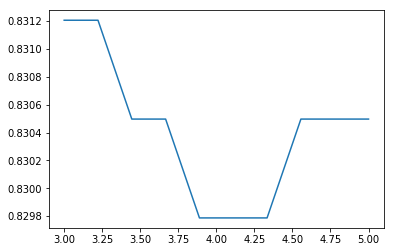

In [106]:
plt.plot(C_range,score);

#### 追求平衡

under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:00:359221
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856100
00:01:942676
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856069
00:03:199247
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855985
00:04:098589
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:05:241697
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855994
00:06:694481
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855956
00:07:707822
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855861
00:08:703344
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855841
00:09:867822
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855804
00:11:167006
under C 10.531053, testing acc

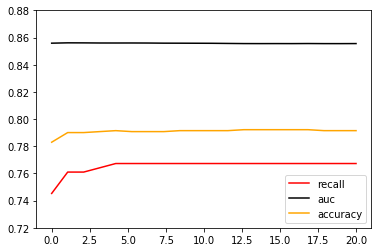

In [107]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    
print(max(aucall),C_range[aucall.index(max(aucall))])

plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

In [108]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947,class_weight = "balanced").fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790071,recall is 0.761006', auc is 0.856100
00:01:883968


#### 绘制roc曲线

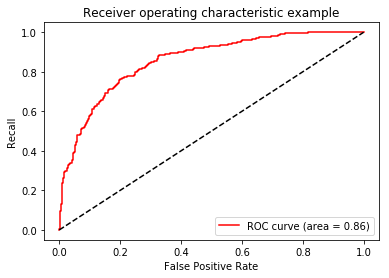

In [109]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)  # pos_label关注的少数类样本标签
area = roc_auc_score(Ytest,clf.decision_function(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',
label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [110]:
FPR

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.15750916e-04,
       9.15750916e-04, 2.74725275e-03, 2.74725275e-03, 3.66300366e-03,
       3.66300366e-03, 4.57875458e-03, 4.57875458e-03, 5.49450549e-03,
       5.49450549e-03, 6.41025641e-03, 6.41025641e-03, 7.32600733e-03,
       7.32600733e-03, 8.24175824e-03, 8.24175824e-03, 9.15750916e-03,
       9.15750916e-03, 1.00732601e-02, 1.00732601e-02, 1.09890110e-02,
       1.09890110e-02, 1.28205128e-02, 1.28205128e-02, 1.55677656e-02,
       1.55677656e-02, 1.64835165e-02, 1.64835165e-02, 1.73992674e-02,
       1.73992674e-02, 2.28937729e-02, 2.28937729e-02, 2.38095238e-02,
       2.38095238e-02, 2.47252747e-02, 2.47252747e-02, 2.56410256e-02,
       2.56410256e-02, 2.83882784e-02, 2.83882784e-02, 3.02197802e-02,
       3.02197802e-02, 3.11355311e-02, 3.11355311e-02, 3.57142857e-02,
       3.57142857e-02, 4.02930403e-02, 4.02930403e-02, 4.12087912e-02,
       4.12087912e-02, 4.30402930e-02, 4.30402930e-02, 4.39560440e-02,
      

In [111]:
(Recall-FPR).tolist().index(max(Recall-FPR))

array([0.        , 0.00314465, 0.00628931, 0.00628931, 0.00943396,
       0.00943396, 0.02830189, 0.02830189, 0.09748428, 0.09748428,
       0.10691824, 0.10691824, 0.12578616, 0.12578616, 0.12893082,
       0.12893082, 0.16981132, 0.16981132, 0.21698113, 0.21698113,
       0.22012579, 0.22012579, 0.23899371, 0.23899371, 0.25157233,
       0.25157233, 0.26415094, 0.26415094, 0.2672956 , 0.2672956 ,
       0.29245283, 0.29245283, 0.29559748, 0.29559748, 0.29874214,
       0.29874214, 0.30503145, 0.30503145, 0.3081761 , 0.3081761 ,
       0.31446541, 0.31446541, 0.31761006, 0.31761006, 0.32704403,
       0.32704403, 0.33333333, 0.33333333, 0.33647799, 0.33647799,
       0.33962264, 0.33962264, 0.3427673 , 0.3427673 , 0.35534591,
       0.35534591, 0.37421384, 0.37421384, 0.3836478 , 0.3836478 ,
       0.38679245, 0.38679245, 0.38993711, 0.38993711, 0.39308176,
       0.39308176, 0.39937107, 0.39937107, 0.42138365, 0.42138365,
       0.42767296, 0.42767296, 0.43081761, 0.43081761, 0.44339

In [112]:
thresholds

array([ 5.57233605e+00,  4.57233605e+00,  4.04650060e+00,  3.63913754e+00,
        3.39319318e+00,  3.32729544e+00,  3.11502289e+00,  3.06809410e+00,
        2.64464478e+00,  2.64109353e+00,  2.58738418e+00,  2.58090894e+00,
        2.42453208e+00,  2.37842430e+00,  2.35794152e+00,  2.34643550e+00,
        2.14745283e+00,  2.14585082e+00,  2.03330992e+00,  2.03230824e+00,
        2.01836655e+00,  2.01015297e+00,  1.89605002e+00,  1.89412609e+00,
        1.85845379e+00,  1.84132949e+00,  1.75718014e+00,  1.73651047e+00,
        1.71568434e+00,  1.71447873e+00,  1.67512218e+00,  1.67421032e+00,
        1.66104289e+00,  1.62686090e+00,  1.61975325e+00,  1.60108755e+00,
        1.58221395e+00,  1.57483978e+00,  1.57390617e+00,  1.56571281e+00,
        1.54474156e+00,  1.51906080e+00,  1.51034887e+00,  1.48349896e+00,
        1.44324899e+00,  1.44249028e+00,  1.43927862e+00,  1.37472452e+00,
        1.36801862e+00,  1.33522587e+00,  1.33390155e+00,  1.32673896e+00,
        1.31092583e+00,  

In [113]:
#找最佳阈值
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.011916119080159437

In [114]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947,class_weight = "balanced").fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.788652,recall is 0.767296
00:01:810314
